In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

print(xtrain.shape, xtest.shape)
print(ytrain.shape, ytest.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [4]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(ytrain)
y_test = np_utils.to_categorical(ytest)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


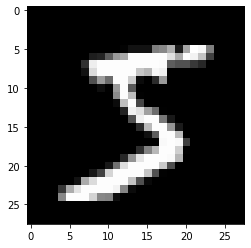

In [7]:
plt.imshow(xtrain[0], cmap='gray')
plt.show()

In [9]:
x_train = xtrain.reshape(60000, 28, 28, 1)
x_test = xtest.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
X_train = x_train[:3600]
X_test = x_test[:900]

Y_train = y_train[:3600]
Y_test = y_test[:900]

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3600, 28, 28, 1) (900, 28, 28, 1)
(3600, 10) (900, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [16]:
model = Sequential()

model.add(Flatten(input_shape=(28,28,1)))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_5 (Activation)    (None, 10)               

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
model.fit(X_train, Y_train,
         validation_data=(X_test, Y_test),
         batch_size =16,
         epochs =12,
         verbose =1)

Epoch 1/12
225/225 [==============================] - 1s 4ms/step - loss: 8.2399 - accuracy: 0.7108 - val_loss: 3.6542 - val_accuracy: 0.7644
Epoch 2/12
225/225 [==============================] - 1s 3ms/step - loss: 1.5087 - accuracy: 0.8700 - val_loss: 3.3308 - val_accuracy: 0.7556
Epoch 3/12
225/225 [==============================] - 1s 4ms/step - loss: 1.0736 - accuracy: 0.9003 - val_loss: 2.3688 - val_accuracy: 0.8189
Epoch 4/12
225/225 [==============================] - 1s 4ms/step - loss: 0.7277 - accuracy: 0.9228 - val_loss: 3.0769 - val_accuracy: 0.7933
Epoch 5/12
225/225 [==============================] - 1s 3ms/step - loss: 0.6303 - accuracy: 0.9314 - val_loss: 2.7639 - val_accuracy: 0.8244
Epoch 6/12
225/225 [==============================] - 1s 3ms/step - loss: 0.5384 - accuracy: 0.9383 - val_loss: 1.9079 - val_accuracy: 0.8533
Epoch 7/12
225/225 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.9569 - val_loss: 2.2983 - val_accuracy: 0.8622
Epoch 